In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [181]:
df = pd.read_csv("shopping_trends_updated1.csv")

In [179]:
df["Color"].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [74]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [75]:
df.describe(include='O')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [76]:
df.isnull().any()

Customer ID                 False
Age                         False
Gender                      False
Item Purchased              False
Category                    False
Purchase Amount (USD)       False
Location                    False
Size                        False
Color                       False
Season                      False
Review Rating               False
Subscription Status         False
Payment Method              False
Shipping Type               False
Discount Applied            False
Promo Code Used             False
Previous Purchases          False
Preferred Payment Method    False
Frequency of Purchases      False
dtype: bool

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [78]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [79]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Numeric 컬럼 상관계수
피어슨, 스피어만 , 켄달 타우 모두 비슷하게 매우 낮은 값

In [80]:
df.corr(numeric_only=True)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


In [182]:
df.loc[:, ['Age', 'Purchase Amount (USD)', 'Review Rating']].corr(method='pearson')

,Age,Purchase Amount (USD),Review Rating
Age,1.000000,-0.010424,-0.021949
Purchase Amount (USD),-0.010424,1.000000,0.030776
Review Rating,-0.021949,0.030776,1.000000


Boolean 값 (Yes, No) / 성별 1, 0으로 치환

In [183]:
df1 = df.copy()

In [83]:
df1.loc[df['Discount Applied']== 'Yes', 'Discount Applied'] = 1
df1.loc[df['Promo Code Used']== 'Yes', 'Promo Code Used'] = 1

df1.loc[df['Discount Applied']== 'No', 'Discount Applied'] = 0
df1.loc[df['Promo Code Used']== 'No', 'Promo Code Used'] = 0


In [84]:
df1.loc[df['Gender']=='Male', 'Gender'] = 1
df1.loc[df['Gender']=='Female', 'Gender'] = 0 

In [176]:
df1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Review Rating Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Low
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Low
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Low
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Medium
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Low


결제수단, 이전구입

In [184]:
df1.groupby('Payment Method')['Previous Purchases'].sum()

Payment Method
Bank Transfer    14995
Cash             16920
Credit Card      17170
Debit Card       16257
PayPal           17270
Venmo            16259
Name: Previous Purchases, dtype: int64

상품 색상 별 별점


In [185]:
df1.groupby(['Item Purchased', 'Color'])['Review Rating'].median()

Item Purchased  Color    
Backpack        Beige        3.20
                Black        4.00
                Blue         4.20
                Brown        3.95
                Charcoal     4.20
                             ... 
T-shirt         Teal         4.20
                Turquoise    4.20
                Violet       3.40
                White        4.10
                Yellow       4.00
Name: Review Rating, Length: 625, dtype: float64

지역별 판매액 총합

In [186]:
df1.groupby('Location')['Purchase Amount (USD)'].sum().sort_values()

Location
Kansas            3437
Hawaii            3752
Florida           3798
New Jersey        3802
Rhode Island      3871
Wisconsin         4196
Iowa              4201
New Hampshire     4219
Colorado          4222
Connecticut       4226
South Dakota      4236
Oregon            4243
Wyoming           4309
Arizona           4326
Oklahoma          4376
Massachusetts     4384
Maine             4388
Kentucky          4402
South Carolina    4439
Utah              4443
Michigan          4533
Washington        4623
Georgia           4645
Ohio              4649
Indiana           4655
Missouri          4691
Texas             4712
North Carolina    4742
Delaware          4758
Tennessee         4772
Maryland          4795
Arkansas          4828
Virginia          4842
Louisiana         4848
Vermont           4860
Alaska            4867
Mississippi       4883
Pennsylvania      4926
Minnesota         4977
New Mexico        5014
Nebraska          5172
West Virginia     5174
North Dakota      5220
Ne

상품의 쿠폰 사용 여부 별 별점 중간값

In [187]:
df1.groupby(['Item Purchased', 'Promo Code Used'])['Review Rating'].median()

Item Purchased  Promo Code Used
Backpack        No                 3.50
                Yes                3.85
Belt            No                 3.60
                Yes                3.80
Blouse          No                 3.70
                Yes                3.60
Boots           No                 3.70
                Yes                4.00
Coat            No                 3.80
                Yes                3.90
Dress           No                 3.70
                Yes                3.60
Gloves          No                 4.05
                Yes                3.90
Handbag         No                 3.90
                Yes                3.60
Hat             No                 3.90
                Yes                3.80
Hoodie          No                 3.80
                Yes                3.65
Jacket          No                 3.90
                Yes                3.60
Jeans           No                 3.50
                Yes                3.90
Jewelry 

전체 상품별 별점 중간값

In [188]:
df1.groupby('Item Purchased')['Review Rating'].median()

Item Purchased
Backpack      3.70
Belt          3.70
Blouse        3.70
Boots         3.90
Coat          3.80
Dress         3.70
Gloves        3.90
Handbag       3.80
Hat           3.90
Hoodie        3.70
Jacket        3.70
Jeans         3.65
Jewelry       3.80
Pants         3.70
Sandals       3.95
Scarf         3.60
Shirt         3.50
Shoes         3.70
Shorts        3.70
Skirt         3.90
Sneakers      3.80
Socks         3.70
Sunglasses    3.60
Sweater       3.80
T-shirt       3.80
Name: Review Rating, dtype: float64

In [189]:
df1.groupby(['Frequency of Purchases', 'Item Purchased']).size()

Frequency of Purchases  Item Purchased
Annually                Backpack          22
                        Belt              24
                        Blouse            32
                        Boots             15
                        Coat              23
                                          ..
Weekly                  Sneakers          20
                        Socks             14
                        Sunglasses        24
                        Sweater           31
                        T-shirt           19
Length: 175, dtype: int64

계절별 카테고리 판매량



In [190]:

seasonal_trends = df1.groupby(['Season', 'Category'])['Purchase Amount (USD)'].count().unstack().fillna(0)
seasonal_trends

Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,324,427,136,88
Spring,301,454,163,81
Summer,312,408,160,75
Winter,303,448,140,80


<Axes: xlabel='Category', ylabel='count'>

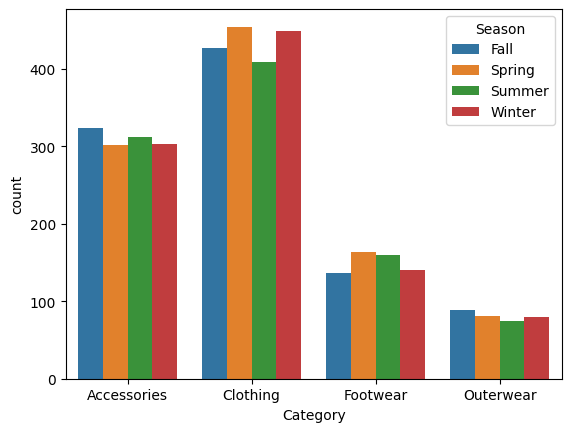

In [126]:
data_long = seasonal_trends.reset_index().melt(id_vars='Season', var_name='Category', value_name='count')

sns.barplot(data=data_long, x='Category', y='count', hue='Season')

별점 분포 ( 0~5 단계라 낮음 구간을 조금 넓게 잡았습니다.)

In [213]:
df1['Review Rating Category'] = pd.cut(df1['Review Rating'], bins=[0, 3.1, 4.1, 5], labels=['0', '1', '2'])
review_rating_relationship = df1.groupby('Review Rating Category')['Purchase Amount (USD)'].count()

review_rating_relationship

/tmp/ipykernel_1009/4203375831.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_rating_relationship = df1.groupby('Review Rating Category')['Purchase Amount (USD)'].count()


Review Rating Category
0    1004
1    1581
2    1315
Name: Purchase Amount (USD), dtype: int64

In [192]:
df_rrc = pd.DataFrame(review_rating_relationship).reset_index()
df_rrc.columns = ['Review Rating Category', 'Purchase Amount (USD)']

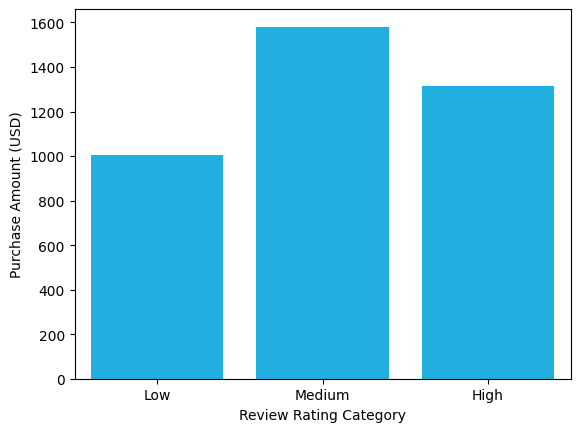

In [193]:
sns.barplot( x= 'Review Rating Category', y='Purchase Amount (USD)', data= df_rrc, color='deepskyblue')
plt.show()

구독 여부와 이전 구매 

In [194]:
subscription_status_relationship_mean = df1.groupby('Subscription Status')['Previous Purchases'].mean()
subscription_status_relationship_sum = df1.groupby('Subscription Status')['Previous Purchases'].sum()
subscription_status_relationship_median= df1.groupby('Subscription Status')['Previous Purchases'].median()

구독 여부 시각화


평균

<Axes: xlabel='Subscription Status', ylabel='Previous Purchases'>

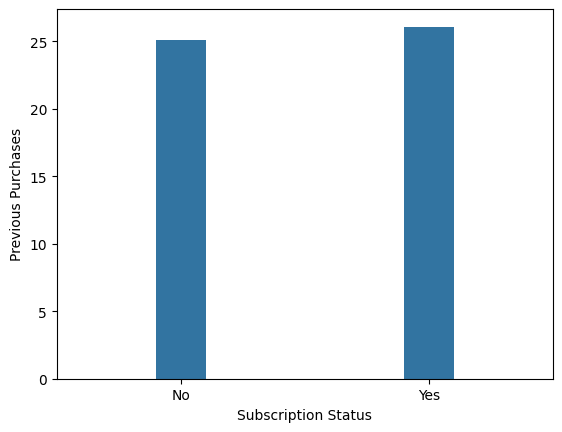

In [195]:
sns.barplot(subscription_status_relationship_mean, width=0.2)

중앙값

<Axes: xlabel='Subscription Status', ylabel='Previous Purchases'>

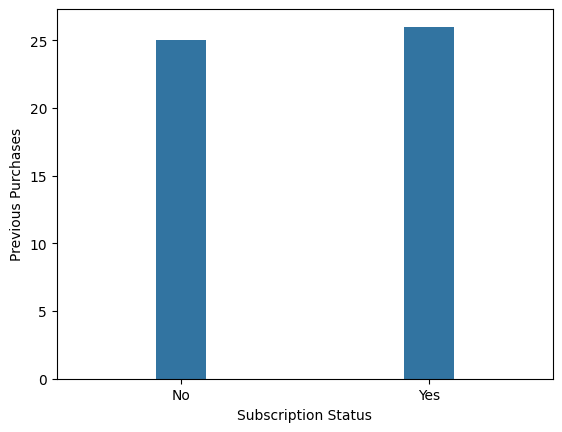

In [196]:
sns.barplot(subscription_status_relationship_median, width=0.2)

총합

<Axes: xlabel='Subscription Status', ylabel='Previous Purchases'>

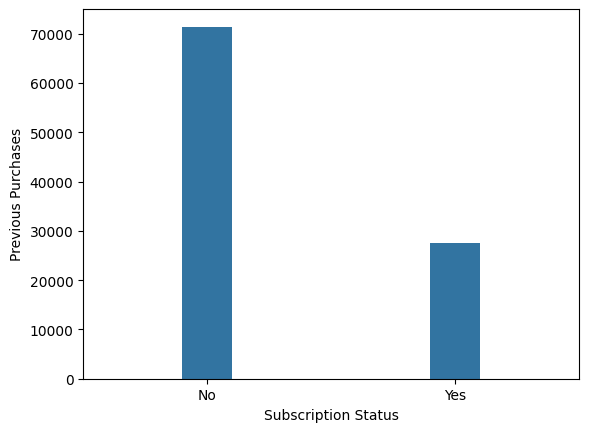

In [134]:
sns.barplot(subscription_status_relationship_sum, width=0.2)

In [247]:
df1['Previous Purchases qt'].unique()

array([1, 0, 3, 2])

In [199]:
q75 = df1.loc[:,['Previous Purchases', 'Purchase Amount (USD)']].quantile(0.75)
q50 = df1.loc[:,['Previous Purchases', "Purchase Amount (USD)"]].quantile(0.5)
q25 = df1.loc[:,["Previous Purchases", "Purchase Amount (USD)"]].quantile(0.25)


In [274]:
q25

Previous Purchases       13.0
Purchase Amount (USD)    39.0
Name: 0.25, dtype: float64

In [211]:
df1.groupby('Frequency of Purchases')['Customer ID'].count()

Frequency of Purchases
Annually        572
Fortnightly    1089
Monthly         553
Quarterly      1147
Weekly          539
Name: Customer ID, dtype: int64

In [209]:
df1.loc[df['Frequency of Purchases']=="Every 3 Months", 'Frequency of Purchases'] = 'Quarterly'

In [210]:
df1.loc[df['Frequency of Purchases']=="Bi-Weekly", 'Frequency of Purchases'] = 'Fortnightly'

In [217]:
df1.loc[df['Frequency of Purchases']=='Annually', 'Frequency of Purchases'] = 0
df1.loc[df['Frequency of Purchases']=='Quarterly', 'Frequency of Purchases'] = 1
df1.loc[df['Frequency of Purchases']=='Monthly', 'Frequency of Purchases'] = 2
df1.loc[df['Frequency of Purchases']=='Fortnightly', 'Frequency of Purchases'] = 3
df1.loc[df['Frequency of Purchases']=='Weekly', 'Frequency of Purchases'] = 4


In [288]:
df_a = df1.loc[:, ['Customer ID', 'Purchase Amount (USD)',  'Previous Purchases',  'Frequency of Purchases', 'Review Rating Category']]

In [273]:
df1.tail()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,...,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Item Purchased_new,Age_group,location_new,Review Rating Category,Previous Purchases qt
3895,3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,...,No,No,32,Venmo,4,tops,40s,South,2,2
3896,3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,...,No,No,41,Bank Transfer,3,bags,50s,Midwest,2,3
3897,3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,...,No,No,24,Venmo,1,accessories,40s,Northeast,0,1
3898,3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,...,No,No,24,Venmo,4,shoes,40s,Midwest,1,1
3899,3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,...,No,No,33,Venmo,1,bags,50s,West,0,2


In [264]:
df1['Frequency of Purchases'].unique()

array([3, 4, 0, 1, 2], dtype=object)

In [265]:
df1.loc[df1['Frequency of Purchases']=='Quarterly', 'Frequency of Purchases'] = 1
df1.loc[df1['Frequency of Purchases']=='Fortnightly', 'Frequency of Purchases'] = 3

In [266]:
df_a.set_index("Customer ID", inplace=True)

In [289]:
df_a

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,Review Rating Category
0,1,53,14,3,0
1,2,64,2,3,0
2,3,73,23,4,0
3,4,90,49,4,1
4,5,49,31,0,0
...,...,...,...,...,...
3895,3896,28,32,4,2
3896,3897,49,41,3,2
3897,3898,33,24,1,0
3898,3899,77,24,4,1


In [290]:
pp_q75 = df1['Previous Purchases'].quantile(0.75)
pp_q50 = df1['Previous Purchases'].quantile(0.5)
pp_q25 = df1['Previous Purchases'].quantile(0.25)

def Previous_Purchases_score(x, df_a):
    if x >= pp_q75:
        return 3
    elif x >= pp_q50:
        return 2
    elif x >= pp_q25:
        return 1
    else:
        return 0
    return 0

df_a['Previous Purchases'] = df1['Previous Purchases'].apply(lambda x : Previous_Purchases_score(x, df1))

In [291]:
pa_q75 = df1['Purchase Amount (USD)'].quantile(0.75)
pa_q50 = df1['Purchase Amount (USD)'].quantile(0.5)
pa_q25 = df1['Purchase Amount (USD)'].quantile(0.25)

def Purchase_amount_qt(x, df_a):
    if x >= pa_q75:
        return 3
    elif x >= pa_q50:
        return 2
    elif x >= pa_q25:
        return 1
    else:
        return 0
    return 0

df_a['Purchase Amount (USD)'] = df1['Purchase Amount (USD)'].apply(lambda x : Purchase_amount_qt(x, df1))

In [292]:
df_a['Purchase Amount (USD)'].unique()

array([1, 2, 3, 0])

In [303]:
df_a.to_csv("numeric_to_categorical.csv")


In [298]:
df_a.dtypes

Customer ID                  int64
Purchase Amount (USD)        int64
Previous Purchases           int64
Frequency of Purchases      object
Review Rating Category    category
dtype: object

In [299]:
df_a["Frequency of Purchases"] = df_a["Frequency of Purchases"].astype(int)
df_a["Review Rating Category"] = df_a["Review Rating Category"].astype(int)

In [300]:
df_a['qt_sum'] = df_a[["Purchase Amount (USD)","Previous Purchases","Frequency of Purchases","Review Rating Category"]].sum(axis=1)

In [304]:
df_a.columns

Index(['Customer ID', 'Purchase Amount (USD)', 'Previous Purchases',
       'Frequency of Purchases', 'Review Rating Category', 'qt_sum'],
      dtype='object')

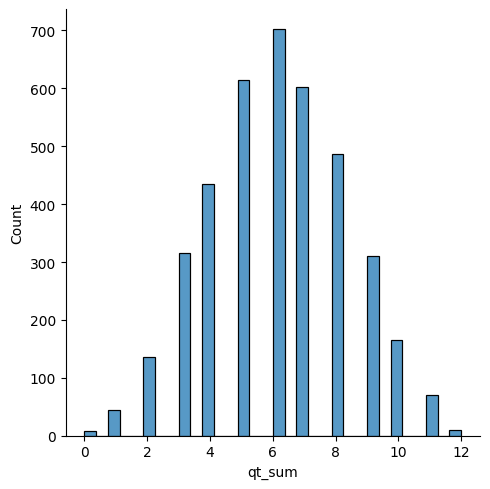

In [302]:
sns.displot(df_a["qt_sum"])